In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## Timestamp Object
- Time stamp reference particular moments in time(eg. Octth,  at 7:00pm)

In [ ]:
# creating timestamp object
pd.Timestamp('2023/1/5')

In [ ]:
# variables
pd.Timestamp('2023-01-12')


In [ ]:
# only year
pd.Timestamp('2023')

In [ ]:
# using text
pd.Timestamp('16 January 2023')

In [ ]:
# providing time also
pd.Timestamp('16 January 2023  9:21 PM')

#### Using pandas datetime

In [12]:
import datetime as dt

In [ ]:
dt.datetime(2023,1,5,9,21,56)

In [ ]:
x = pd.Timestamp(dt.datetime(2023,1,5,9,21,56))
x

In [ ]:
# fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

### Why separate object to handle date and time when python already has datetime functionality?
- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [ ]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

In [ ]:
date + np.arange(12)

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### DatetimeIndex Object
- A collection of pandas timestamp

In [ ]:
# from strings
pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1'])

In [ ]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

In [32]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])

In [ ]:
# using datatimeindex as series index

pd.Series([1,2,3],index=dt_index)

### date_range function

In [ ]:
# generate daily dates in a given range
pd.date_range(start='2023/1/5',end='2023/2/28',freq='3D')

In [ ]:
# alternate days in a given range
pd.date_range(start='2023/1/5',end='2023/2/28',freq='3D')
# freq = 3D will work in 3 alternative day

In [ ]:
pd.date_range(start='2023/1/5',end='2023/2/28',freq='B')
# B will give only business day


In [ ]:
# W -> one week per day
pd.date_range(start='2023/1/5',end='2023/2/28',freq='W-THU')

In [ ]:
# H -> Hourly data(factor)
pd.date_range(start='2023/1/5',end='2023/2/28',freq='6H')

In [ ]:
# M -> Month end
pd.date_range(start='2023/1/5',end='2023/2/28',freq='M')
# M will give only month end

In [ ]:
# MS -> Month start
pd.date_range(start='2023/1/5',end='2023/2/28',freq='MS')

In [ ]:
# A -> Year end
pd.date_range(start='2023/1/5',end='2030/2/28',freq='A')

In [ ]:
# using periods(number of results)
pd.date_range(start='2023/1/5',periods=25,freq='M')

- to_datetime function
 converts an  existing object to pandas timestmp/ datetimeindex object

In [ ]:
# simple series example

s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s).dt.day_name()

In [ ]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce').dt.month_name()

In [47]:
df = pd.read_csv('expense_data.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [52]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

dt accessor
- Accessor object for datetimelike properties of the Series values.

In [ ]:
df['Date'].dt.is_quarter_start

In [ ]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [56]:
# day name wise bar chart/month wise bar chart

df['day_name'] = df['Date'].dt.day_name()

In [ ]:
df.head()

In [ ]:
df.groupby('day_name')['INR'].mean().plot(kind='bar')

In [59]:
df['month_name'] = df['Date'].dt.month_name()

In [ ]:
df.groupby('month_name')['INR'].sum().plot(kind='bar')

In [ ]:
df[df['Date'].dt.is_month_end]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### TimeDelta object
- Represents a duration, the difference between two dates  or times

In [ ]:
# creating using Timestamp object
t1 = pd.Timestamp('6th January 2025 8:20:14')
t2 = pd.Timestamp('8th January 2025 8:20:14')
t2-t1

In [ ]:
#standard creation
pd.Timedelta(days  = 2, hours = 10, minutes = 51)

In [ ]:
#Arithmetic 
pd.Timestamp('6th January 2023') + pd.Timedelta(days  = 2, hours = 10, minutes = 51)

In [ ]:
pd.date_range(start='2025-1-13', end ='2025-2-28', freq='D') + pd.Timedelta(days  = 2, hours = 10, minutes = 51)

## Time series
- A time series is a data set that tracks a sample over time. In particular, a time allows one to see what factor influence certain variables fromperiod to period. Time series analyst can be useful to see how a given asset, security, or economic variable changes over time.

### Type of operations done in timeseries
- Time series analysis
- Time series Forecasting


In [44]:
google = pd.read_csv('google.csv')

In [45]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [46]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [47]:
google['Date'] = pd.to_datetime(google['Date'])

In [48]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4431 non-null   datetime64[ns]
 1   Open       4431 non-null   float64       
 2   High       4431 non-null   float64       
 3   Low        4431 non-null   float64       
 4   Close      4431 non-null   float64       
 5   Adj Close  4431 non-null   float64       
 6   Volume     4431 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 242.4 KB


In [49]:
google.set_index('Date',inplace = True)

In [50]:
google.sample()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,2907.919922,2929.699951,2874.330078,2887.98999,2887.98999,1420000


In [51]:
# fetching a special date
google.loc['2008-03-04']

Open         2.257007e+02
High         2.269069e+02
Low          2.181081e+02
Close        2.225225e+02
Adj Close    2.225225e+02
Volume       2.721616e+07
Name: 2008-03-04 00:00:00, dtype: float64

In [52]:
# aprtial indexing
google.loc['2021-12'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,2880.000000,2919.010010,2818.239990,2821.030029,2821.030029,1701000
2021-12-02,2825.000000,2877.290039,2804.290039,2859.320068,2859.320068,1459700
2021-12-03,2873.620117,2888.000000,2806.020020,2840.030029,2840.030029,2061500
2021-12-06,2860.810059,2877.050049,2803.000000,2863.100098,2863.100098,1530900
2021-12-07,2911.929932,2950.620117,2904.550049,2945.389893,2945.389893,1612000


In [53]:
# creating your day_name and month_name
google['month_name'] = google.index.month_name()
google['day_name'] = google.index.day_name()
google['quarter'] = google.index.quarter

In [54]:
google.sample()

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2008-11-25,134.474472,143.47348,133.793793,141.166168,141.166168,21520858,November,Tuesday,4


In [55]:
# slicing
google.loc['2021-01-12': '2022-01-12']

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2021-01-12,1745.359985,1767.900024,1716.380005,1737.430054,1737.430054,1476400,January,Tuesday,1
2021-01-13,1727.319946,1756.390015,1727.319946,1747.250000,1747.250000,1171600,January,Wednesday,1
2021-01-14,1748.869995,1767.550049,1726.069946,1730.920044,1730.920044,1460600,January,Thursday,1
2021-01-15,1729.020020,1747.619995,1711.709961,1727.619995,1727.619995,1572200,January,Friday,1
2021-01-19,1743.000000,1803.839966,1732.829956,1784.469971,1784.469971,2083000,January,Tuesday,1
...,...,...,...,...,...,...,...,...,...
2022-01-06,2739.969971,2798.800049,2731.169922,2754.949951,2754.949951,1867400,January,Thursday,1
2022-01-07,2762.909912,2768.969971,2715.330078,2740.340088,2740.340088,1488000,January,Friday,1
2022-01-10,2701.560059,2776.389893,2663.290039,2773.389893,2773.389893,2220400,January,Monday,1


In [56]:
# fetching particular day of every year -> limitation of timedelta
pd.date_range(start='2005-01-06', end='2021-01-06', freq='1Y')


DatetimeIndex(['2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [57]:
google[google.index.isin(pd.date_range(start='2005-01-06', end='2021-01-06', freq='1Y'))]

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2007-12-31,349.634644,351.596588,345.635651,346.086090,346.086090,4747648,December,Monday,4
2008-12-31,152.252258,155.655655,151.456451,153.978973,153.978973,5767826,December,Wednesday,4
2009-12-31,312.687683,313.013000,310.300293,310.300293,310.300293,2437160,December,Thursday,4
2010-12-31,298.668671,299.509521,296.311310,297.282288,297.282288,3075521,December,Friday,4
2012-12-31,350.350342,355.640656,348.348358,354.044037,354.044037,3990805,December,Monday,4
2013-12-31,556.676697,561.061035,553.683655,560.915894,560.915894,2713084,December,Tuesday,4
2014-12-31,537.739990,538.400024,530.200012,530.659973,530.659973,1232400,December,Wednesday,4
2015-12-31,787.820007,788.330017,777.320007,778.010010,778.010010,1637600,December,Thursday,4
2018-12-31,1057.829956,1062.989990,1033.040039,1044.959961,1044.959961,1655500,December,Monday,4


In [58]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,August,Monday,3
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,August,Tuesday,3
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,August,Wednesday,3


<Axes: xlabel='Date'>

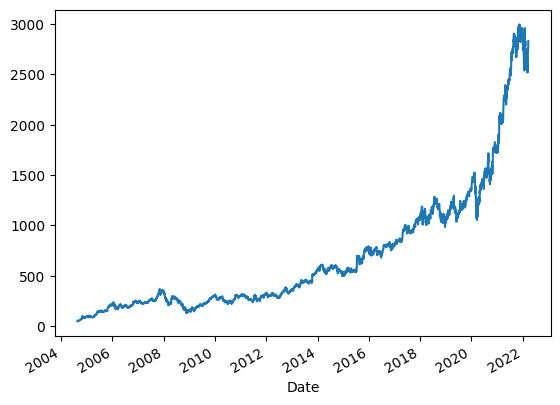

In [60]:
google['Close'].plot()

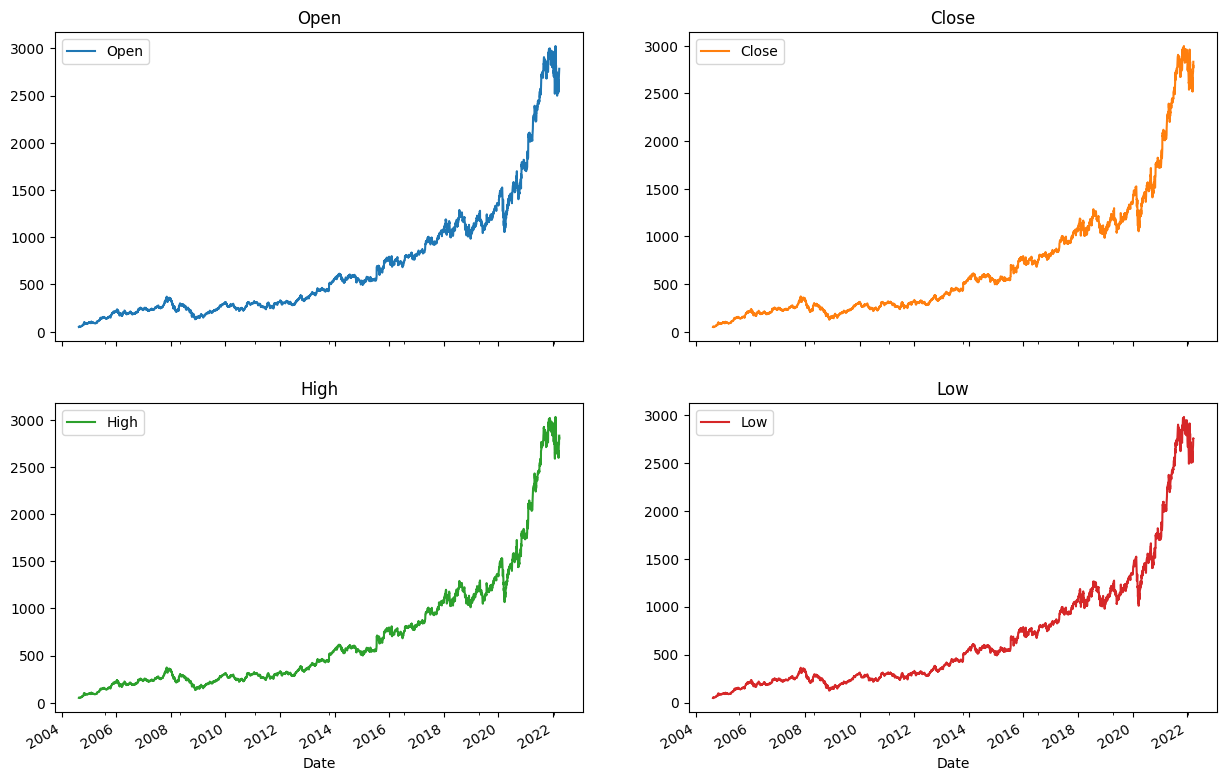

In [63]:
google_share = google[['Open','Close','High','Low']]
graph = google_share.plot(subplots = True,
                     title =['Open','Close','High','Low'],
                     layout = (2,2),
                     figsize=(15,10))

<Axes: xlabel='Date'>

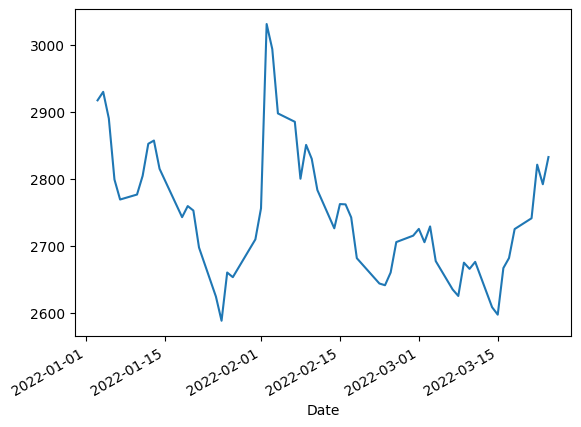

In [64]:
#plot for particular month/year
google.loc['2022']['High'].plot()

<Axes: xlabel='Date'>

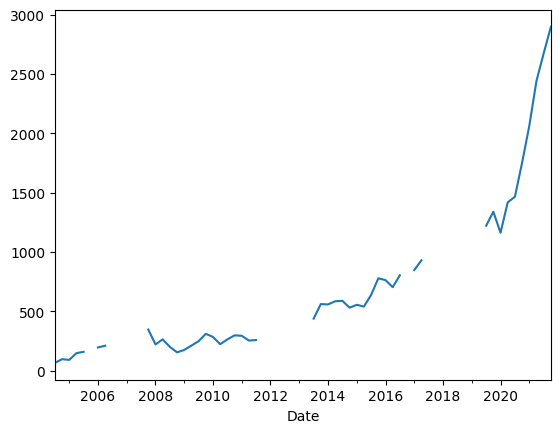

In [70]:
# quarterly trend
google['Close'].asfreq('Q').plot()

In [66]:
#frequency
google.index
# freq=None

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=4431, freq=None)

In [69]:
#asfreq
google.asfreq('D')
# google.asfreq('Y')
# google.asfreq('Q')

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0,August,Friday,3.0
2004-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0,August,Monday,3.0
...,...,...,...,...,...,...,...,...,...
2022-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600.0,March,Monday,1.0
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800.0,March,Tuesday,1.0


## Resampling
- It involves the changing the frequency of your time series observations.

### Two type of Resampling are:-
- Unsampling :- where you increase the frequency of the sampling, such as from minutes to seconds.
- Downsampling :- Where you decrease the frequency of the sampling, such as from days to months.

<Axes: xlabel='Date'>

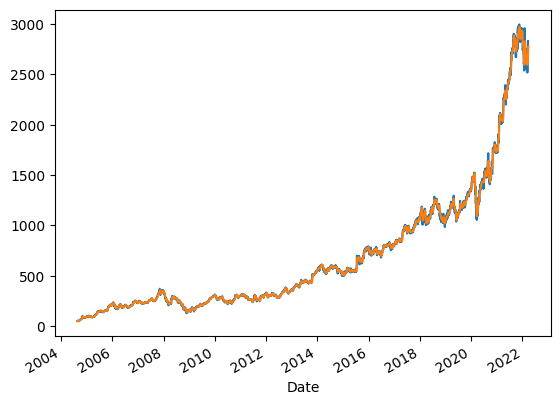

In [73]:
# Downsampling
google['Close'].plot()
google['Close'].resample('W').mean().plot()

<Axes: xlabel='Date'>

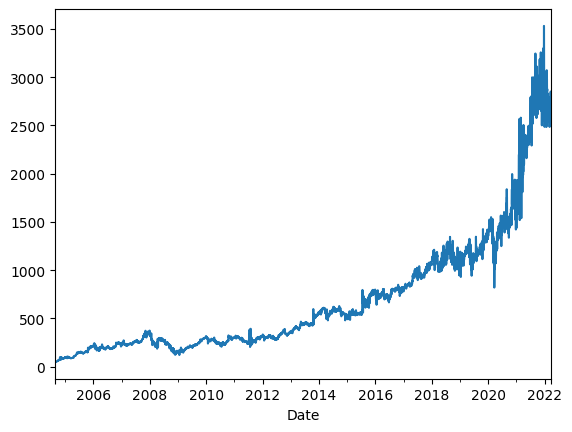

In [76]:
#upsampling
google['Close'].resample('H').interpolate(method='spline', order=2).plot()

## Rolling Window
- We are taking here rolling average as 3, so it will take average by adding 3 numbers.

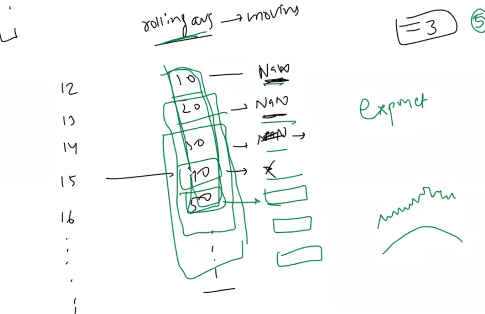

In [78]:
# Rolling window
google['Open'].rolling(3).agg('mean')

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23      52.012012
2004-08-24      53.887221
2004-08-25      54.546212
                 ...     
2022-03-18    2648.709961
2022-03-21    2684.913330
2022-03-22    2704.596680
2022-03-23    2739.783366
2022-03-24    2760.026693
Name: Open, Length: 4431, dtype: float64

## Shifting
- shift() function in pandas is used to, well shift the entire series up or down by the desired number of period.

In [81]:
# shift
google['Close'].shift(1)
# shifting one position

Date
2004-08-19            NaN
2004-08-20      50.220219
2004-08-23      54.209209
2004-08-24      54.754753
2004-08-25      52.487488
                 ...     
2022-03-18    2676.780029
2022-03-21    2722.510010
2022-03-22    2722.030029
2022-03-23    2797.360107
2022-03-24    2765.510010
Name: Close, Length: 4431, dtype: float64